In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [2]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

In [3]:
# Display the first five rows of the dataset
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
# Get a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
# Display summary statistics for numerical columns
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
# Check for missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# Impute missing values
imputer_median = SimpleImputer(strategy='median')
df['age'] = imputer_median.fit_transform(df[['age']])[:, 0]  # Flattened to 1D

imputer_mode = SimpleImputer(strategy='most_frequent')
df['embarked'] = imputer_mode.fit_transform(df[['embarked']])[:, 0]  # Flattened
df['embark_town'] = imputer_mode.fit_transform(df[['embark_town']])[:, 0]  # Flattened

In [8]:
# Drop 'deck' column due to excessive missing values
df.drop(columns=['deck'], inplace=True)

In [9]:
# Drop rows with missing 'alive' values
df.dropna(subset=['alive'], inplace=True)

In [10]:
# Feature Engineering: Add Family Size
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [11]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

In [12]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['embarked', 'class', 'who', 'embark_town', 'alive'], drop_first=True)

In [13]:
# Standardize numerical features
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

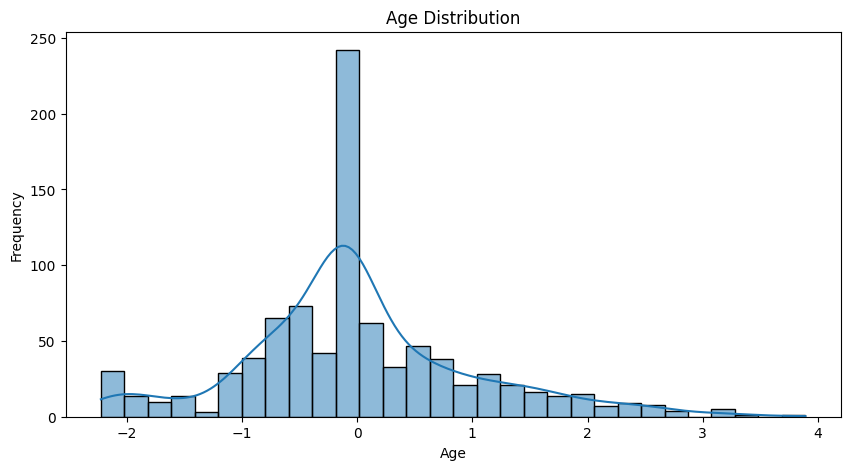

In [14]:
# EDA: Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

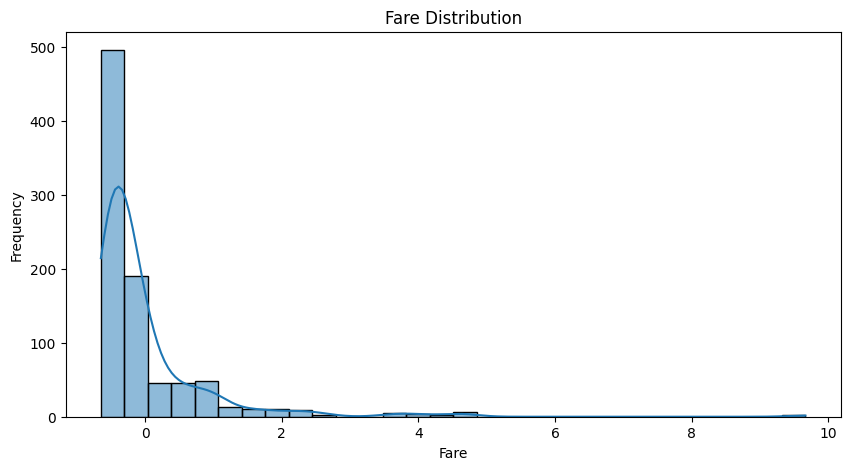

In [15]:
# EDA: Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

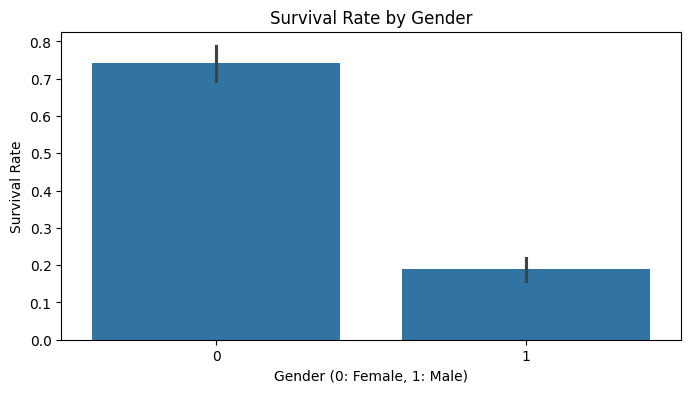

In [16]:
# EDA: Survival rate by gender
plt.figure(figsize=(8, 4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Survival Rate')
plt.show()

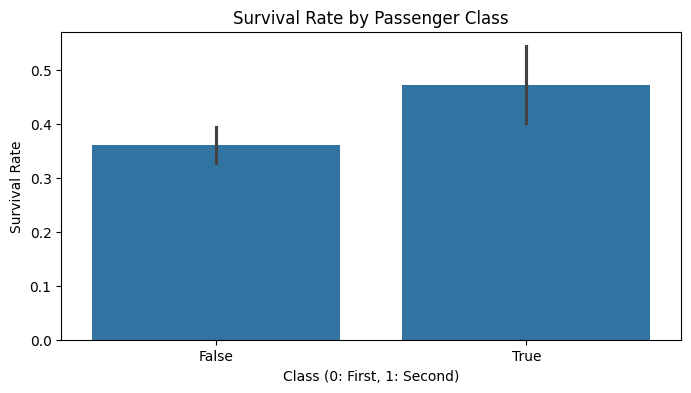

In [17]:
# EDA: Survival rate by Passenger Class
plt.figure(figsize=(8, 4))
sns.barplot(x='class_Second', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class (0: First, 1: Second)')
plt.ylabel('Survival Rate')
plt.show()

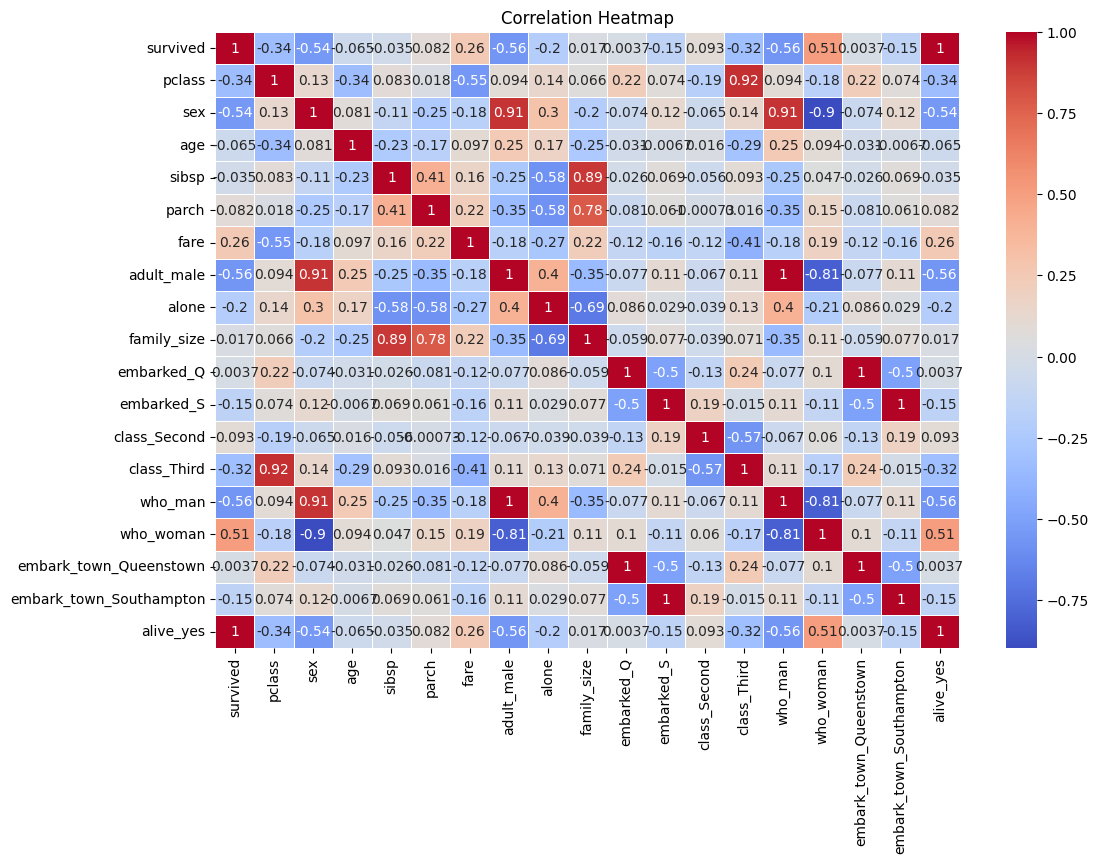

In [18]:
# EDA: Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

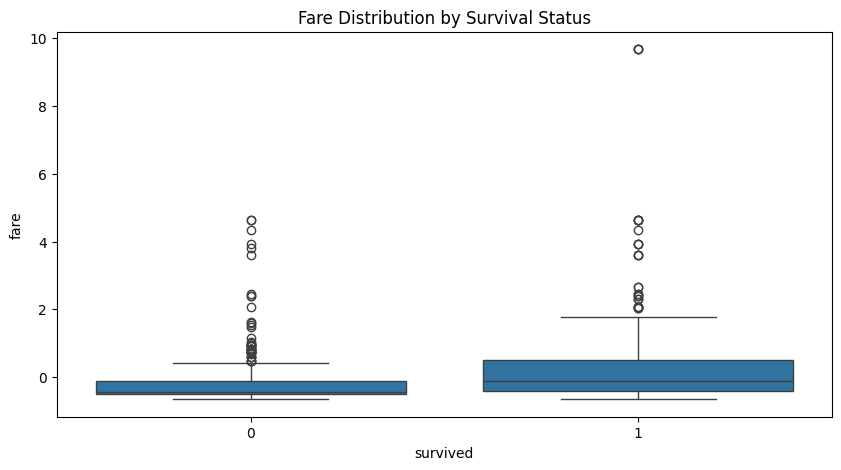

In [19]:
# EDA: Boxplot for Outliers in Fare
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare Distribution by Survival Status')
plt.show()

In [20]:
# Modeling: Prepare data for Logistic Regression
X = df.drop('survived', axis=1)
y = df['survived']

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Predictions
y_pred = model.predict(X_test)

In [24]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Confusion Matrix:
[[157   0]
 [  0 111]]
